## "Text is data but not like Images and Numbers"
1. **MYTH** : Better model solves bad text
2. **REALITY** : Data and representation dominates performance

## Working with Text Data

In [16]:
from sympy.codegen.cnodes import sizeof
%matplotlib inline
from preamble import *
import numpy as np

1. To Download the dataset use winget
2. tar to extract the data from zip

In [ ]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf aclImdb_v1.tar.gz --skip-old-files -C data

In [8]:
!tree -dL 2 aclImdb

Too many parameters - 2


In [9]:
!rm -r aclImdb/train/unsup

# Load data

In [11]:
from sklearn.datasets import load_files

review_train = load_files("aclImdb/train/")
# load_files returns a bunch, containing a training texts and labels
print(type(review_train))

text_train, y_train = review_train.data, review_train.target

print("type of text_train : {}" .format(type(text_train)))
print("type of y_train : {}" .format(type(y_train)))
print("length of text_train : {}" .format(len(text_train)))
print("length of y_train : {}" .format(len(y_train)))

print("text_train [6] : \n{}" .format(text_train[6]))

<class 'sklearn.utils._bunch.Bunch'>
type of text_train : <class 'list'>
type of y_train : <class 'numpy.ndarray'>
length of text_train : 25000
length of y_train : 25000
text_train [6] : 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."
y_train [6] : 
1


***Inspect first pre-processing in the IMDB dataset:***
1. Load data
2. Decode bytes - text
3. Sentence split
4. Word split
5. Vocabulary size
6. Noise analysis
7. Token frequency distribution (visual)
8. Length distribution (visual)

***Decode bytes - clean text***

1. The dataset is in bytes, so convert to string.


In [75]:
import re

# decode
text_train = [doc.decode('utf-8', errors="ignore") for doc in text_train]

# remove HTML tags
text_train = [re.sub(r"<.*?>", " ", doc) for doc in text_train]

# lower case
text_train = [doc.lower() for doc in text_train]

***Sentence Splitting***

In [80]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [81]:
from nltk.tokenize import sent_tokenize

sentences = []
for doc in text_train:
    sentences.extend(sent_tokenize(doc))

print("Total sentences:", len(sentences))
print("Sample sentences:", sentences[:3])

Total sentences: 307417
Sample sentences: ['zero day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates.', 'it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.', 'it is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product.']


***Word Tokenization***

In [82]:
from nltk.tokenize import word_tokenize

tokens = []
for doc in text_train:
    tokens.extend(word_tokenize(doc))

print("Total tokens:", len(tokens))
print("Sample tokens:", tokens[:20])

Total tokens: 6692294
Sample tokens: ['zero', 'day', 'leads', 'you', 'to', 'think', ',', 'even', 're-think', 'why', 'two', 'boys/young', 'men', 'would', 'do', 'what', 'they', 'did', '-', 'commit']


***Vocabulary Size***

In [83]:
vocab = set(tokens)
print("Vocabulary size:", len(vocab))

Vocabulary size: 103726


***Noise Analysis***

1. Numbers
2. Punctuation
3. Very short tokens
4. Non-alphabet tokens

In [84]:
import string

noise_tokens = [t for t in tokens if t.isdigit() or t in string.punctuation or len(t) <=2 or not t.isalpha()]

print("Noise token count:", len(noise_tokens))
print("Noise ratio:", len(noise_tokens)/len(tokens))

Noise token count: 2207696
Noise ratio: 0.329886284135156


***Token Frequency Distribution(Visualization)***

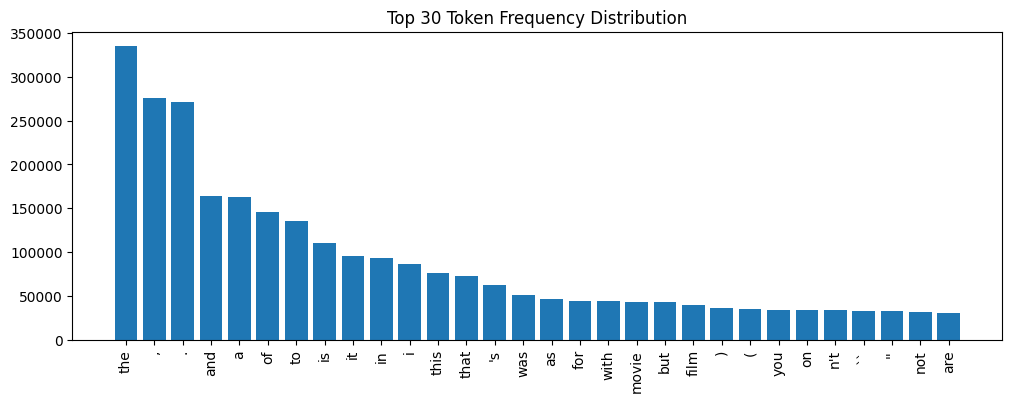

In [85]:
from collections import Counter
import matplotlib.pyplot as plt

token_freq = Counter(tokens)

# top 30 most common words
common = token_freq.most_common(30)

words = [w[0] for w in common]
counts = [w[1] for w in common]

plt.figure(figsize=(12,4))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top 30 Token Frequency Distribution")
plt.show()

***Length Distribution***

1. Document Length Distribution
2. Sentence Length Distribution

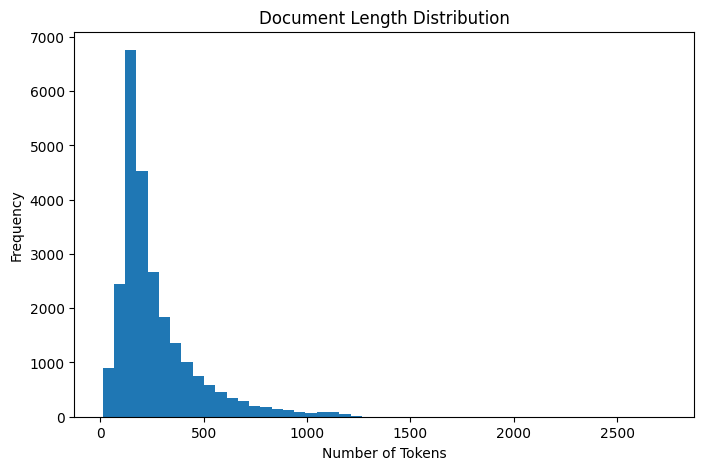

In [86]:
# doc length distribution

doc_lengths = [len(word_tokenize(doc)) for doc in text_train]

plt.figure(figsize=(8,5))
plt.hist(doc_lengths, bins=50)
plt.title("Document Length Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

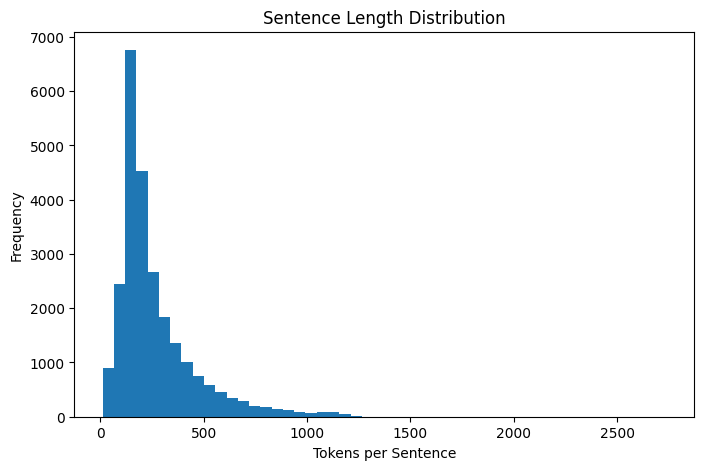

In [87]:
# sentence length distribution

sentence_lengths = [ len(word_tokenize(sent)) for sent in sentences]

plt.figure(figsize=(8,5))
plt.hist(doc_lengths, bins=50)
plt.title("Sentence Length Distribution")
plt.xlabel("Tokens per Sentence")
plt.ylabel("Frequency")
plt.show()